# Agenda
1. Problem Definition
2. Solution Planning
3. Import and Clean Data
4. Exploratory Data Analysis
5. Drawing Conclusions
6. Next Steps

# 1) Problem Definition

**Finding the best chocolate bars**

Now let's now move on to the competition and challenge.

**Background**

You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

### 1.1. Business Questions
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

### 1.2. Knowing the Data

Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

# 2) Solution Planning

### 2.1. Final Product
- Exploratory analysis as a report in html format

### 2.2. Tools Needed
- Python
- Jupyter Notebook
- VSCode

### 2.3. Process:
Step-by-step solution of the business questions:
1. What is the average rating by country of origin?
   1. Group the data by country of origin using the `groupby()` pandas Dataframe method.
   2. Select the **rating** column
   3. Apply the `mean()` method and get the average for each subgroup of country
2. How many bars were reviewed for each of those countries?
   1. Group the data again by country of origin
   2. Get the total number of rows inside each subgroup, using the attribute `shape[0]`
3. Create plots to visualize findings for questions 1 and 2.
   1. Utilize the Seaborn library together with matplotlib to produce some neat visualizations
   2. Question 3:
       - Show a histogram of the average reviews by country of bean origin
       - Plot the top 10 countries of bean origin by average ratin
   3. Question 2:
       - Show a scatter plot with the countries average rating on the x axes and their respective number of bars reviewed on the y axes.
4. Is the cacao bean's origin an indicator of quality?
   1. Plot a histogram on the average Rating of chocolate bars by country, which shows that the format is not uniform, with certain countries having high or very low average Rating.
5. [Optional 1] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
   1. 
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
   1. 
7. Summarize your findings.
   1. Create short text summrizing all the process + fidings

# 3) Importing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('chocolate_bars.csv', sep='>')
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
df.shape

(2530, 10)

## Sumary Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2530 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


Looks like all data are in their appropriate data type.

In [5]:
# Searching for duplicated lines
print( f"Total of duplicated lines: {df.duplicated().sum()}" )

Total of duplicated lines: 0


## Data Preprocessing

In [6]:
countries_company_loc = df["Company Location"].unique()
countries_company_loc

array(['U.S.A.', 'France', 'Fiji', 'Vanuatu', 'Ecuador', 'Mexico', 'U.K.',
       'Netherlands', 'Spain', 'Russia', 'Peru', 'Canada', 'Italy',
       'Brazil', 'Nicaragua', 'Australia', 'Philippines', 'Wales',
       'Belgium', 'Vietnam', 'Germany', 'Singapore', 'Switzerland',
       'Venezuela', 'Malaysia', 'South Korea', 'Taiwan', 'Puerto Rico',
       'Colombia', 'Japan', 'New Zealand', 'Costa Rica', 'Hungary',
       'Amsterdam', 'Scotland', 'Martinique', 'Sao Tome', ' Canada',
       'St. Lucia', 'Argentina', 'Guatemala', 'South Africa',
       'Dominican Republic', 'Sao Tome &amp; Principe', 'Bolivia',
       'Portugal', 'Norway', 'Denmark', 'Grenada', 'Israel', 'India',
       'St.Vincent-Grenadines', ' U.S.A.', 'Czech Republic', 'Thailand',
       'Finland', 'Madagascar', 'Sweden', 'Poland', 'Austria', 'Honduras',
       'U.A.E.', ' Mexico', 'Lithuania', 'Ireland', 'Chile', 'Ghana',
       'Iceland', 'Suriname', ' Ecuador', 'El Salvador'], dtype=object)

In [7]:
countries_origin = df["Country of Bean Origin"].unique()
countries_origin

array(['Tanzania', 'Dominican Republic', 'Madagascar', 'Fiji',
       'Venezuela', 'Uganda', 'India', 'Bolivia', 'Peru', 'Panama',
       'Colombia', 'Burma', 'Brazil', 'Papua New Guinea', 'Ecuador',
       'Cuba', 'Togo', 'Sao Tome', 'Mexico', 'Vanuatu', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Ghana', 'Belize', 'Blend',
       'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Haiti', 'Congo', 'Philippines', 'Solomon Islands', 'Malaysia',
       'Sri Lanka', 'Ivory Coast', 'Gabon', 'Taiwan', 'Puerto Rico',
       'Martinique', 'St. Lucia', 'Australia', 'Liberia', 'Sierra Leone',
       'U.S.A.', 'Nigeria', 'St.Vincent-Grenadines', 'Thailand', 'Tobago',
       'Sao Tome &amp; Principe', 'Sumatra', 'El Salvador', 'Cameroon',
       'Samoa', 'China', 'Principe', 'Sulawesi', 'Suriname', 'DR Congo'],
      dtype=object)

In [8]:
cocoa_percent = df["Cocoa Percent"] = df["Cocoa Percent"].str.replace("%", "").str.strip().astype('float')


In [9]:
df["Cocoa Percent"] = cocoa_percent / 100

# 4) Exploratory Data Analysis

## Answering Businees Questions

### 1) What is the average rating by country of origin?

In [10]:
df_1 = df[["Country of Bean Origin", "Rating"]].groupby( "Country of Bean Origin" ).Rating.mean().sort_values(ascending=False)
df_1

Country of Bean Origin
Tobago                     3.625000
China                      3.500000
Sao Tome &amp; Principe    3.500000
Solomon Islands            3.450000
Congo                      3.318182
                             ...   
Sierra Leone               2.750000
St.Vincent-Grenadines      2.750000
Principe                   2.750000
Martinique                 2.750000
Puerto Rico                2.714286
Name: Rating, Length: 62, dtype: float64

### 2) How many bars were reviewed for each of those countries?

In [11]:
df_2 = df["Country of Bean Origin"].value_counts()
df_2

Venezuela                253
Peru                     244
Dominican Republic       226
Ecuador                  219
Madagascar               177
                        ... 
Sumatra                    1
St.Vincent-Grenadines      1
Martinique                 1
Burma                      1
DR Congo                   1
Name: Country of Bean Origin, Length: 62, dtype: int64

### 3) Create plots to visualize findings for questions 1 and 2.

### Visualizations for Question 1:

/tmp/ipykernel_20416/2283521252.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( labels=top_countries_avg_review.index, rotation=90 )


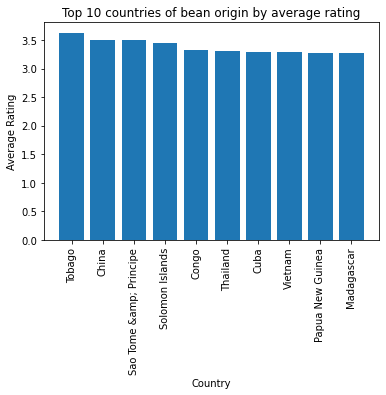

In [13]:
top_countries_avg_review = df_1[:10]
fig, ax = plt.subplots()

ax.bar(x=top_countries_avg_review.index, height=top_countries_avg_review.values)
ax.set_xlabel( "Country" )
ax.set_ylabel( "Average Rating" )
ax.set_xticklabels( labels=top_countries_avg_review.index, rotation=90 )
ax.set_title( "Top 10 countries of bean origin by average rating" )

plt.show()

### Visualizations for Question 2:

/home/gustavos/.conda/envs/minimal_ds/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel="Country's Average Rating", ylabel='Number of Bars Reviewed'>

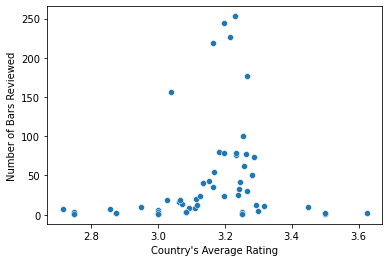

In [14]:
sns.scatterplot( df_1.rename( "Country's Average Rating", inplace=True ), df_2.rename( "Number of Bars Reviewed", inplace=True ) )

**We can notice that the number of bars reviwed for each country does not influency directly its Rating.**

### 4) Is the cacao bean's origin an indicator of quality? 

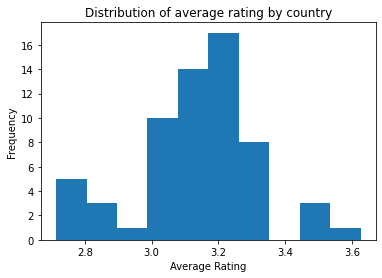

In [ ]:
fig, ax = plt.subplots()

ax.hist(df_1)
ax.set_xlabel( "Average Rating" )
ax.set_ylabel( "Frequency" )
ax.set_title( "Distribution of average rating by country" )

plt.show()

If the cacao bean's origin did not influence the Rating we would likely see in this histogram a uniform distribution, which is not the case, we can see that the distribution is roughly normal and there are some countries with a high average Rating (>= 3.5).

### 5) [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

In [17]:
df_5 = df.copy()

In [18]:
df_5["Cocoa Percent"].corr(df_5["Rating"])

-0.14668959508034768

/home/gustavos/.conda/envs/minimal_ds/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cocoa Percent', ylabel='Rating'>

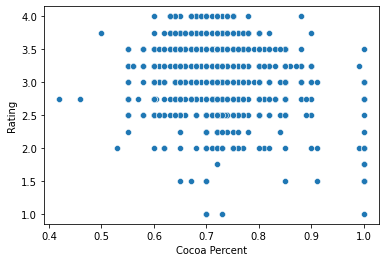

In [19]:
sns.scatterplot(df_5["Cocoa Percent"], df_5["Rating"])

**Cocoa percent on chocolate bars seems to not have much influency on the rating score.**

In [20]:
df.loc[df["Rating"] > 3.5]["Cocoa Percent"].mean()

0.709478155339806

**The average cocoa content for bars with higher ratings (above 3.5) is 70,94%.**

### 6) [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [21]:
df_6 = df.copy()

In [22]:
avg_rating_with_lecithin = df_6.loc[df_6["Ingredients"].str.contains("L")].Rating.agg('mean')
avg_rating_without_lecithin = df_6.loc[~df_6["Ingredients"].str.contains("L")].Rating.agg('mean')

Text(0, 0.5, 'Average Rating')

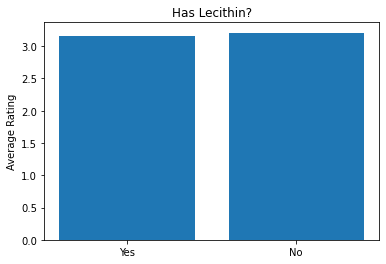

In [23]:
values_xticks = ["Yes", 'No']
fig, ax = plt.subplots()

ax.bar(x=["Yes", "No"], height=[avg_rating_with_lecithin, avg_rating_without_lecithin])
ax.set_title( "Has Lecithin?" )
ax.set_ylabel( "Average Rating" )

**Having or not lecithin in the composition of the ingredients, seems to not influency at all in the Rating.**

# 5) Drawing Conclusions

From this analysis we can deduct certain things:
- We must choose cocoa bean's originated from certain countries, that provides the highest Rating scores.<br>
  ('Tobago', 'China', 'Sao Tome &amp; Principe', 'Solomon Islands', 'Congo', 'Thailand', 'Cuba', 'Vietnam', 'Papua New Guinea', 'Madagascar') 
- We found that chocolate bars with Ratings Higher than 3.5 have, on average, 70% percent of its composition as cocoa, but as a whole, cocoa composition does not influency, in neither way, Rating.
- The chocolate bars composition ranged from around 55% to 92% of cocoa.
- We also found that having or not lecithin as igredient doesn't affect Rating.